# Fig.4 Population frequency of cooperators by network degree

```julia
# ../data/20220528_225738/*.csv
# simulation_pattern: 30
trial_count = 10
agent_count = 10^3
generations = 10^4

network_type_list = [:scale_free_4, :regular_4, :random_4]
hop_game_list = [1]
hop_learning_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b_list = [5.0]  # [4.0, 4.5, 5.0, 5.5, 6.0]
μ_list = [0.0]  # [0.0, 0.01]
δ_list = [1.0]  # [0.0625, 0.125, 0.25, 0.5, 1.0]
update_rule_list = [DB]  # [DB, IM]
```

In [1]:
import glob
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set(font_scale = 1.6, style = 'darkgrid')

In [6]:
COLUMNS = {
    'network_type': str,
    'hop_game': int,
    'hop_learning': int,
    'b': float,
    'μ': float,
    'δ': float,
    'update_rule': str,
    'trial': int,
    'step': int,
    'agent_id': int,
    'cooperator_rate': int,
    'degree': int
}

def load_df(csv_file_name: str) -> pd.DataFrame:
    _df = pd.read_csv(csv_file_name, header=None, names=COLUMNS.keys(), dtype=COLUMNS, usecols=[
        'network_type',
        'hop_learning',
        'trial',
        'step',
        'agent_id',
        'cooperator_rate',
        'degree'
    ])
    
    # aggregate cooperator_rate by agent_id
    _df = _df.groupby([
        'network_type',
        'hop_learning',
        'trial',
        'step',
        'degree'
    ]).agg({'cooperator_rate': np.mean}).reset_index()

    return _df[_df.cooperator_rate.notna()]

In [9]:
%%time
# # Load (17min 23s)
# dir_name = '20220528_225738'
# file_list = glob.glob('../../data/{}/*.csv'.format(dir_name))
# print(len(file_list))

# # 302400000 rows × 8 columns -> 4223000 rows × 6 columns
# df_list = [load_df(file) for file in file_list]
# df = pd.concat(df_list).reset_index(drop=True)
# df.to_csv('../../data/{}/summary.csv'.format(dir_name))

df = pd.read_csv('../../data/{}/summary.csv'.format(dir_name))
df

CPU times: user 1.07 s, sys: 32.1 ms, total: 1.1 s
Wall time: 1.1 s


,Unnamed: 0,network_type,hop_learning,trial,step,degree,cooperator_rate
0,0,random_4,1,6,10,1,0.287356
1,1,random_4,1,6,10,2,0.279762
2,2,random_4,1,6,10,3,0.423469
3,3,random_4,1,6,10,4,0.261905
4,4,random_4,1,6,10,5,0.358974
...,...,...,...,...,...,...,...
4222995,4222995,scale_free_4,10,8,10000,51,1.000000
4222996,4222996,scale_free_4,10,8,10000,56,1.000000
4222997,4222997,scale_free_4,10,8,10000,65,1.000000
4222998,4222998,scale_free_4,10,8,10000,66,1.000000


In [10]:
def degree_level(degree: int) -> str:
    if degree < 4:
        return '4_low'
    elif degree < 8:
        return '3_middle'
    elif degree < 16:
        return '2_high'
    else:
        return '1_very high'
        # return 'super high'

In [11]:
df['degree_level'] = df.degree.apply(degree_level)
df['100step'] = df.step.apply(lambda x: int(x / 100))
df

,Unnamed: 0,network_type,hop_learning,trial,step,degree,cooperator_rate,degree_level,100step
0,0,random_4,1,6,10,1,0.287356,4_low,0
1,1,random_4,1,6,10,2,0.279762,4_low,0
2,2,random_4,1,6,10,3,0.423469,4_low,0
3,3,random_4,1,6,10,4,0.261905,3_middle,0
4,4,random_4,1,6,10,5,0.358974,3_middle,0
...,...,...,...,...,...,...,...,...,...
4222995,4222995,scale_free_4,10,8,10000,51,1.000000,1_very high,100
4222996,4222996,scale_free_4,10,8,10000,56,1.000000,1_very high,100
4222997,4222997,scale_free_4,10,8,10000,65,1.000000,1_very high,100
4222998,4222998,scale_free_4,10,8,10000,66,1.000000,1_very high,100


In [12]:
df_trn = df.groupby([
    'network_type',
    'hop_learning',
    'trial',
    '100step',
    'degree_level'
]).agg({
    'cooperator_rate': np.mean
}).reset_index()
df_trn

,network_type,hop_learning,trial,100step,degree_level,cooperator_rate
0,random_4,1,1,0,2_high,0.391799
1,random_4,1,1,0,3_middle,0.435125
2,random_4,1,1,0,4_low,0.478833
3,random_4,1,1,1,2_high,0.234762
4,random_4,1,1,1,3_middle,0.221905
...,...,...,...,...,...,...
80997,scale_free_4,10,10,99,4_low,0.000000
80998,scale_free_4,10,10,100,1_very high,0.000000
80999,scale_free_4,10,10,100,2_high,0.000000
81000,scale_free_4,10,10,100,3_middle,0.000000


CPU times: user 18.4 s, sys: 225 ms, total: 18.6 s
Wall time: 18.6 s


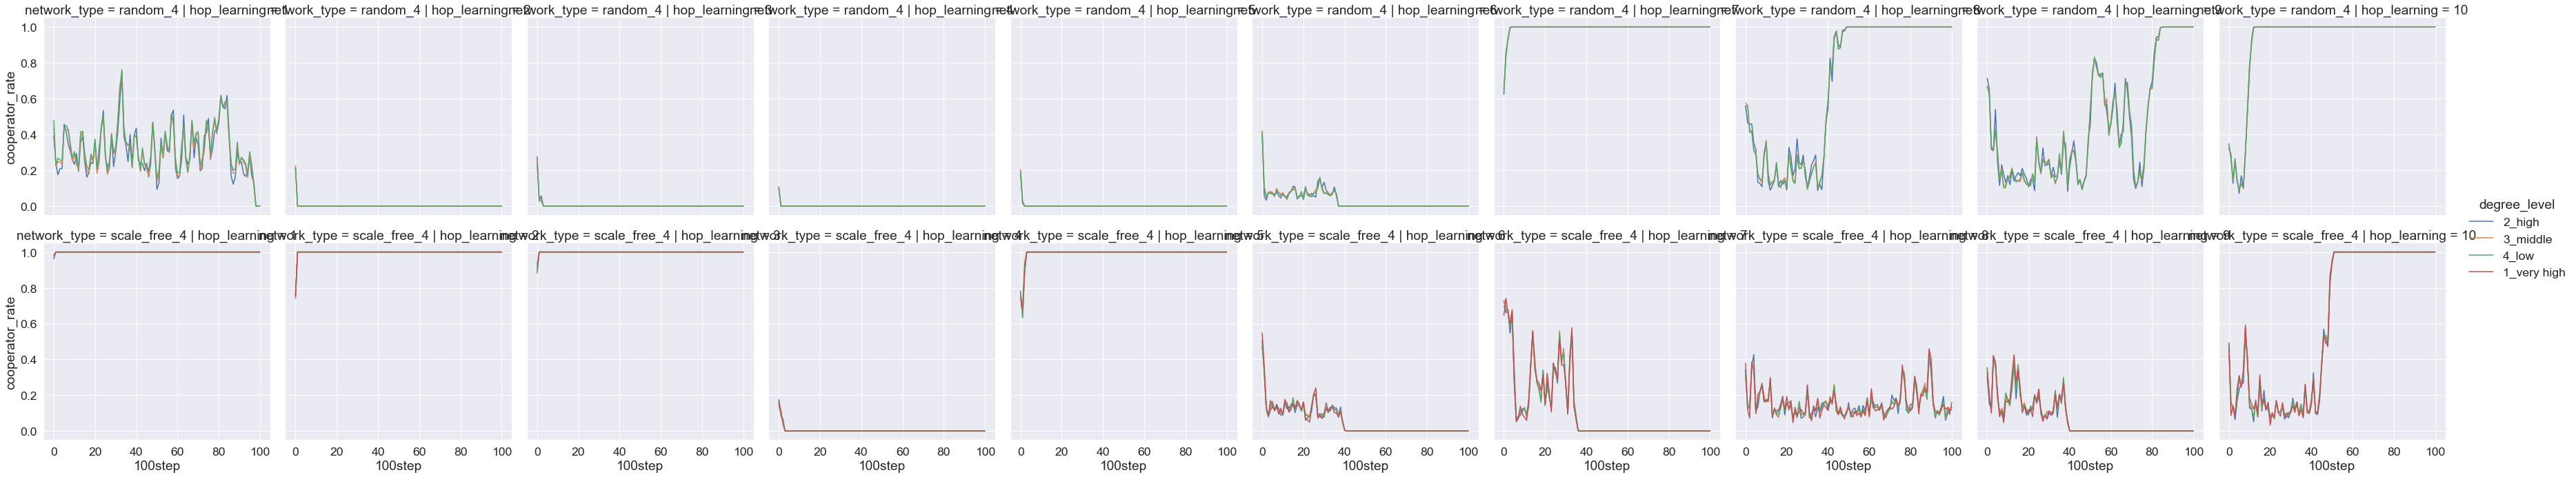

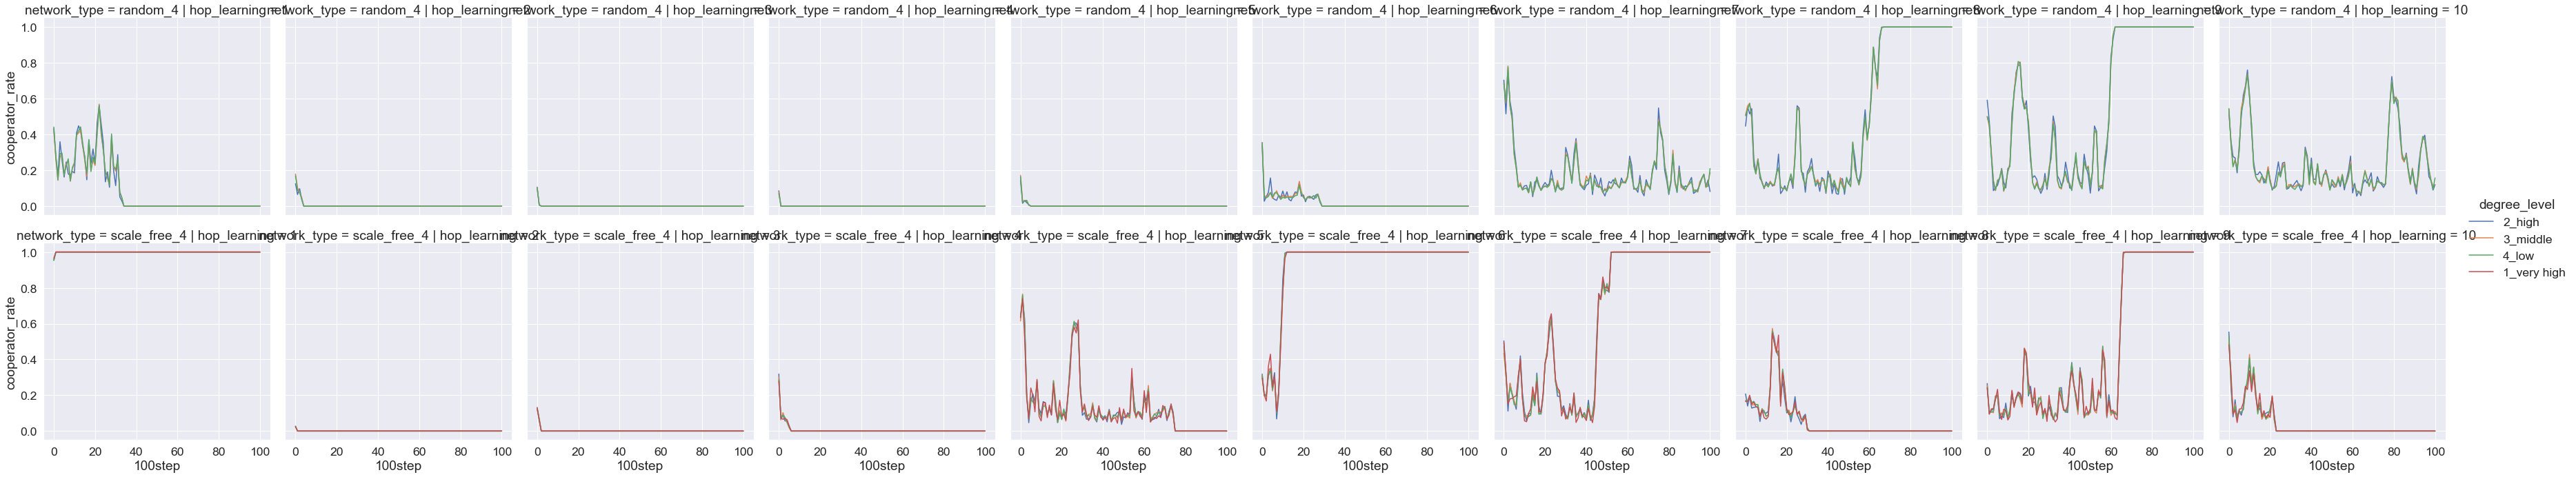

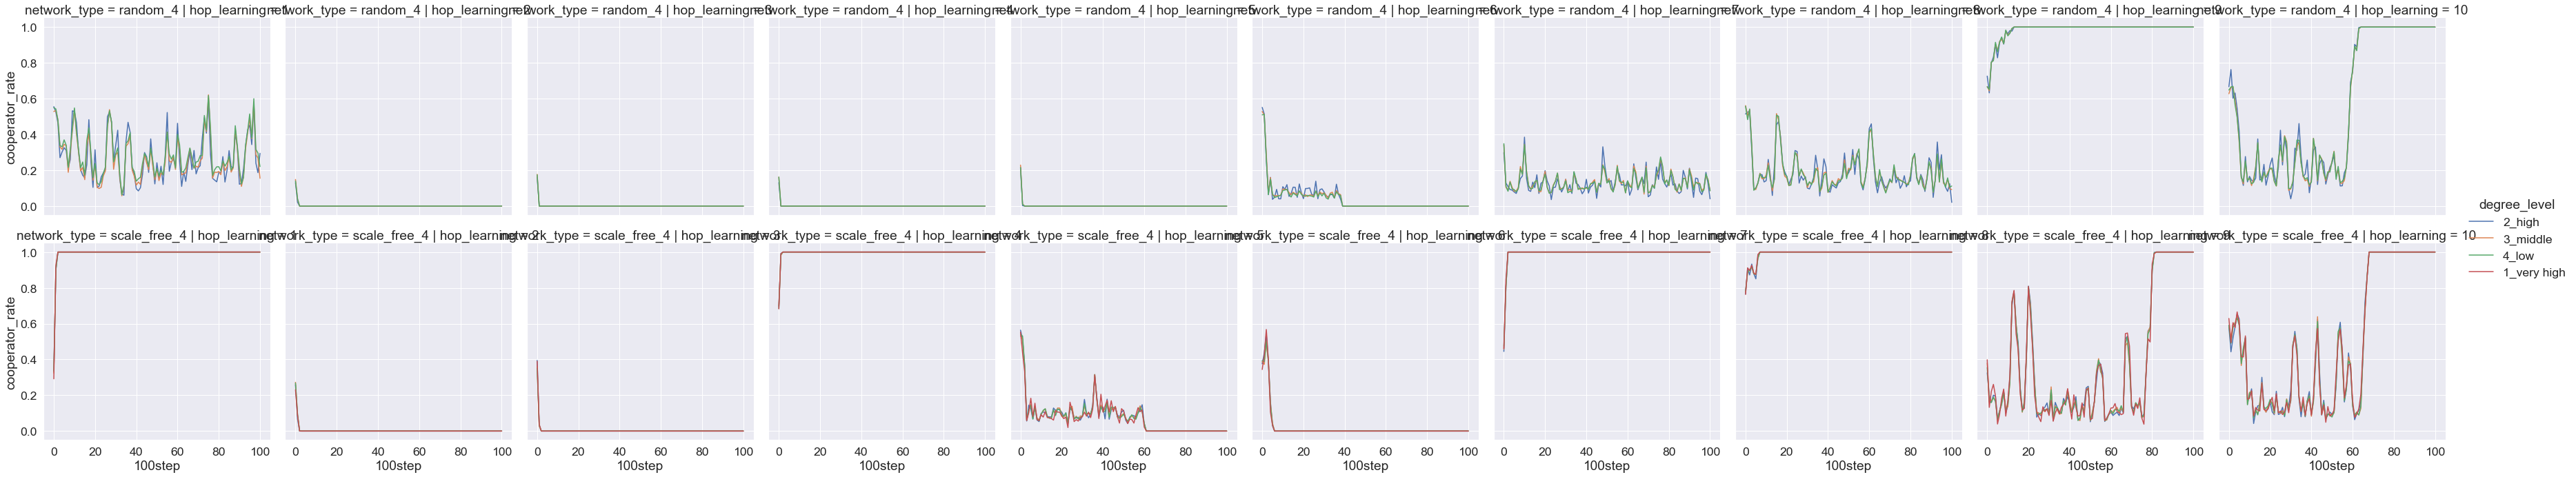

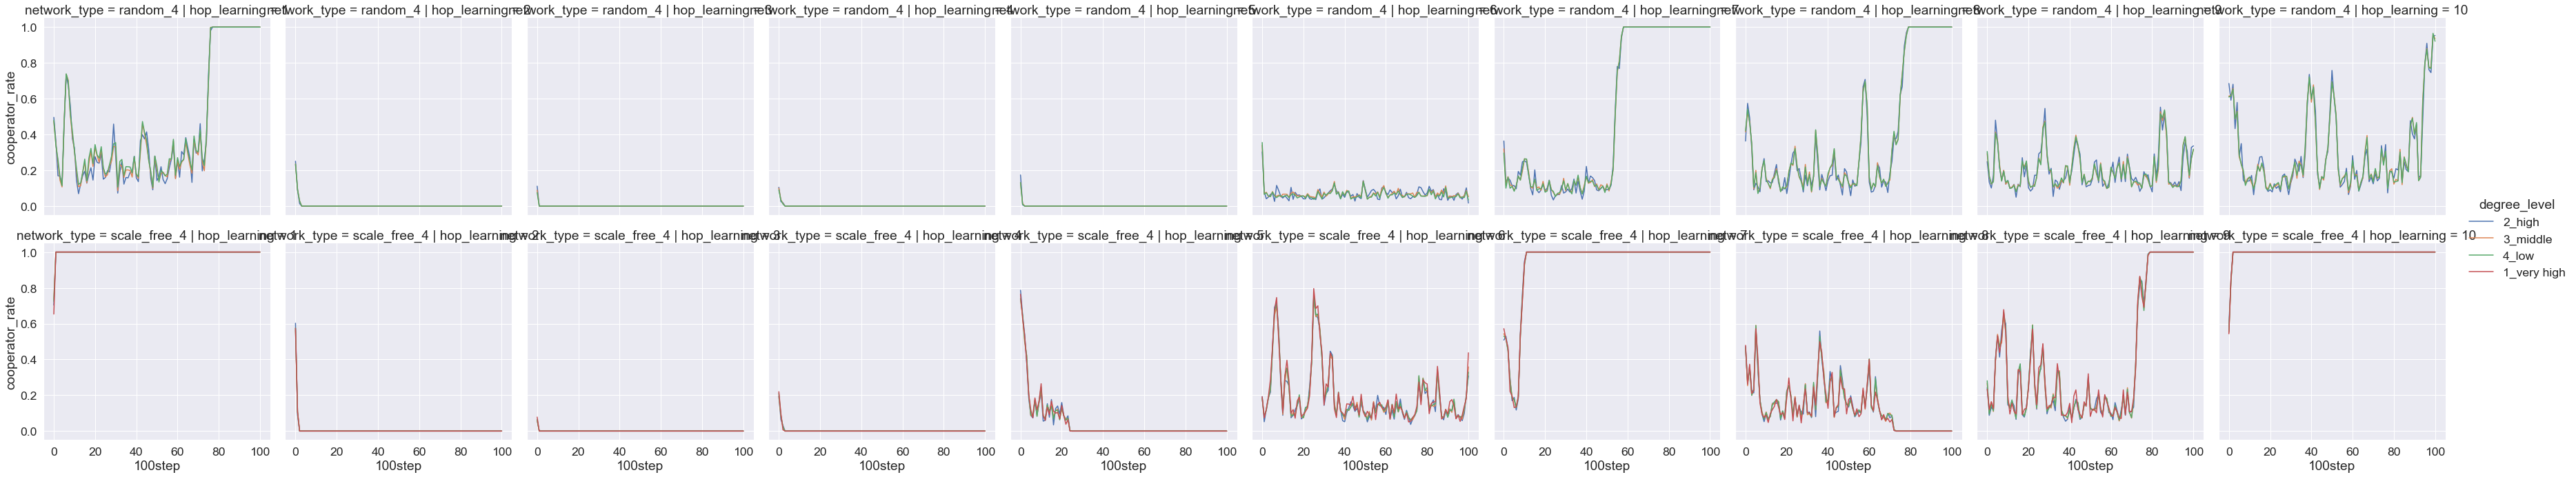

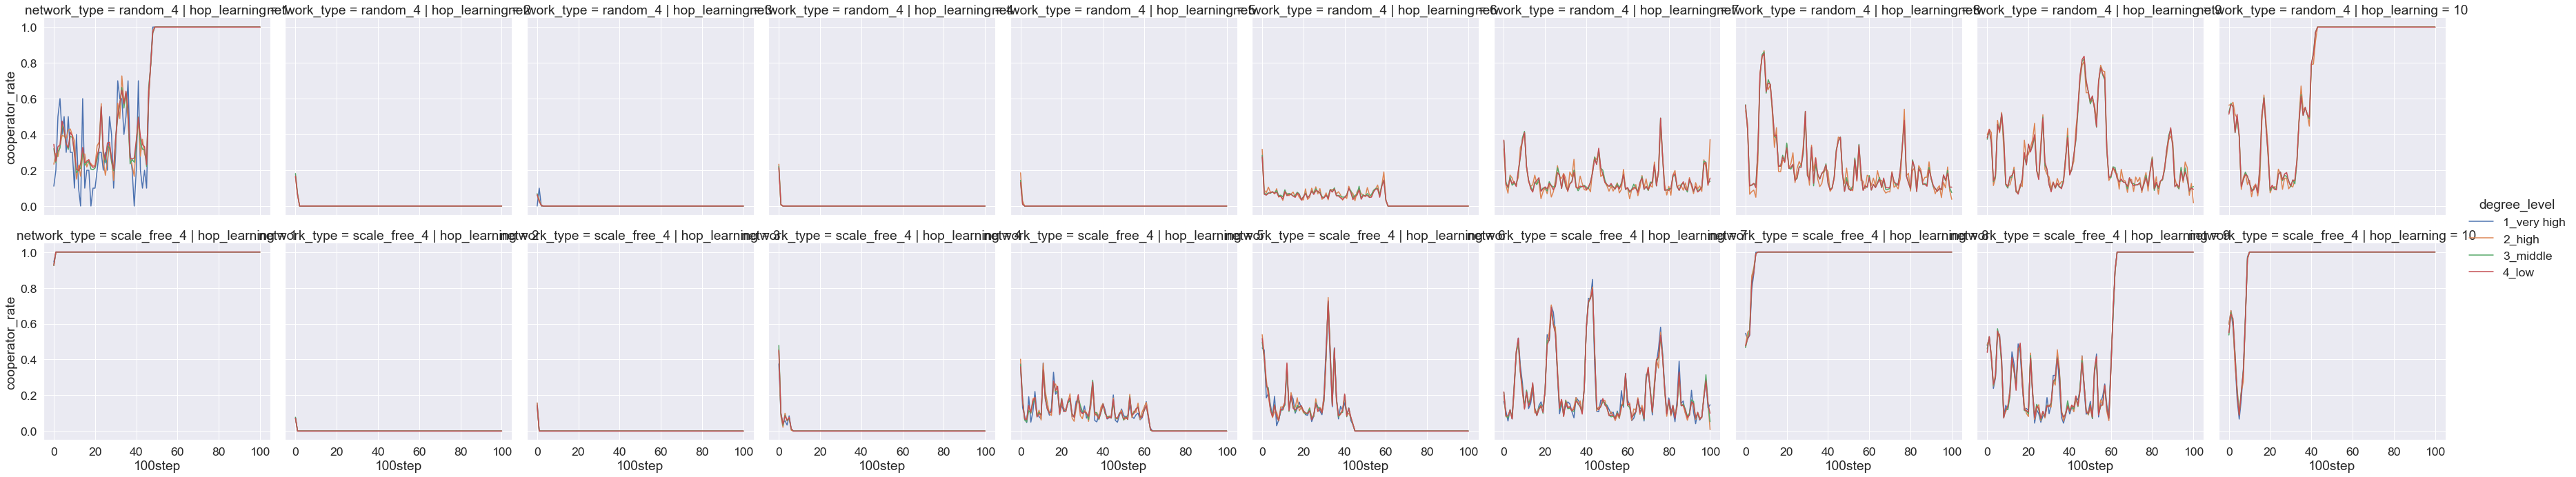

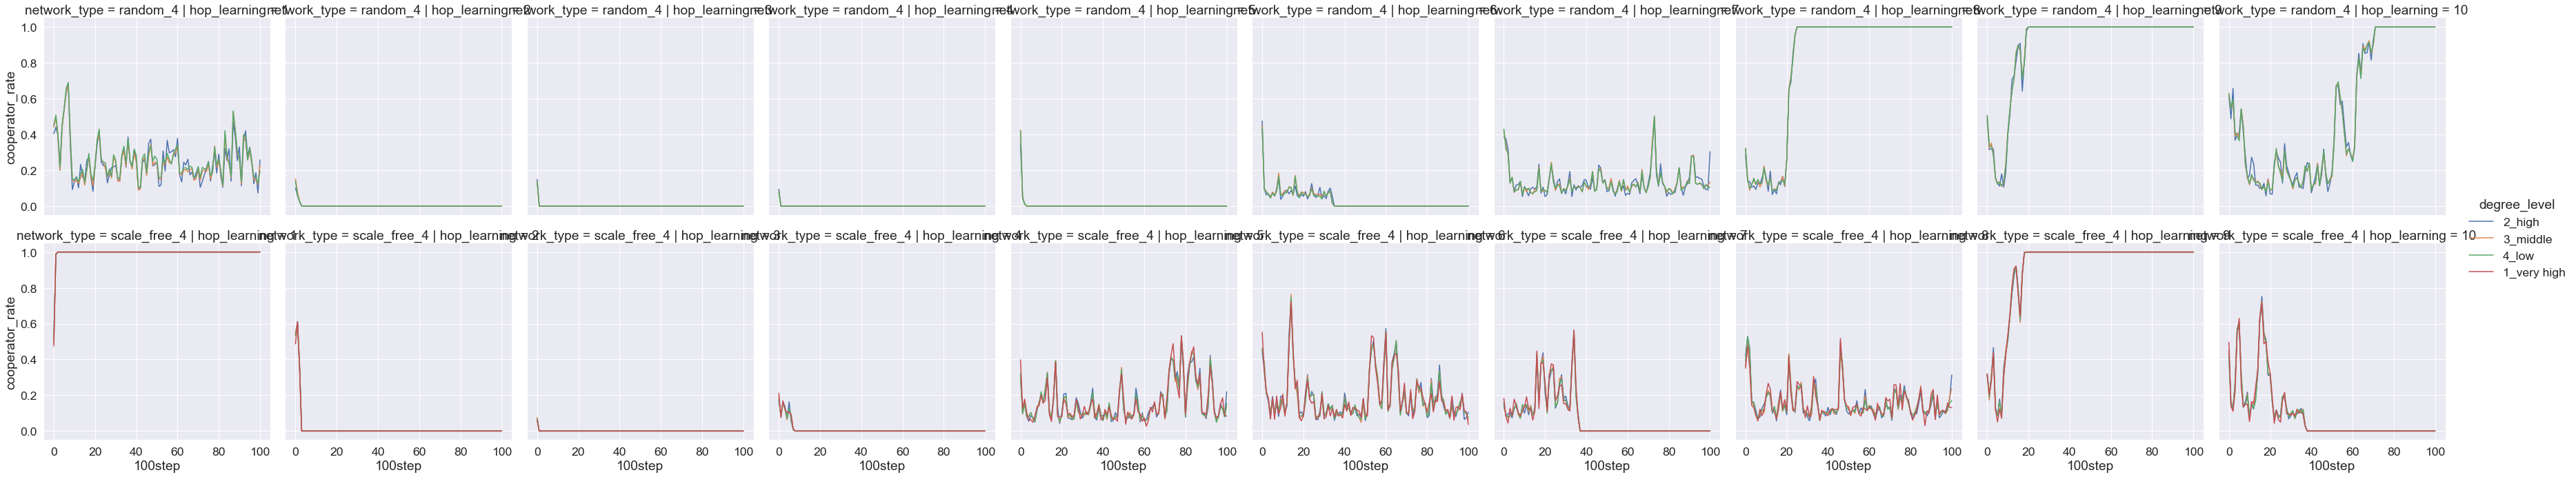

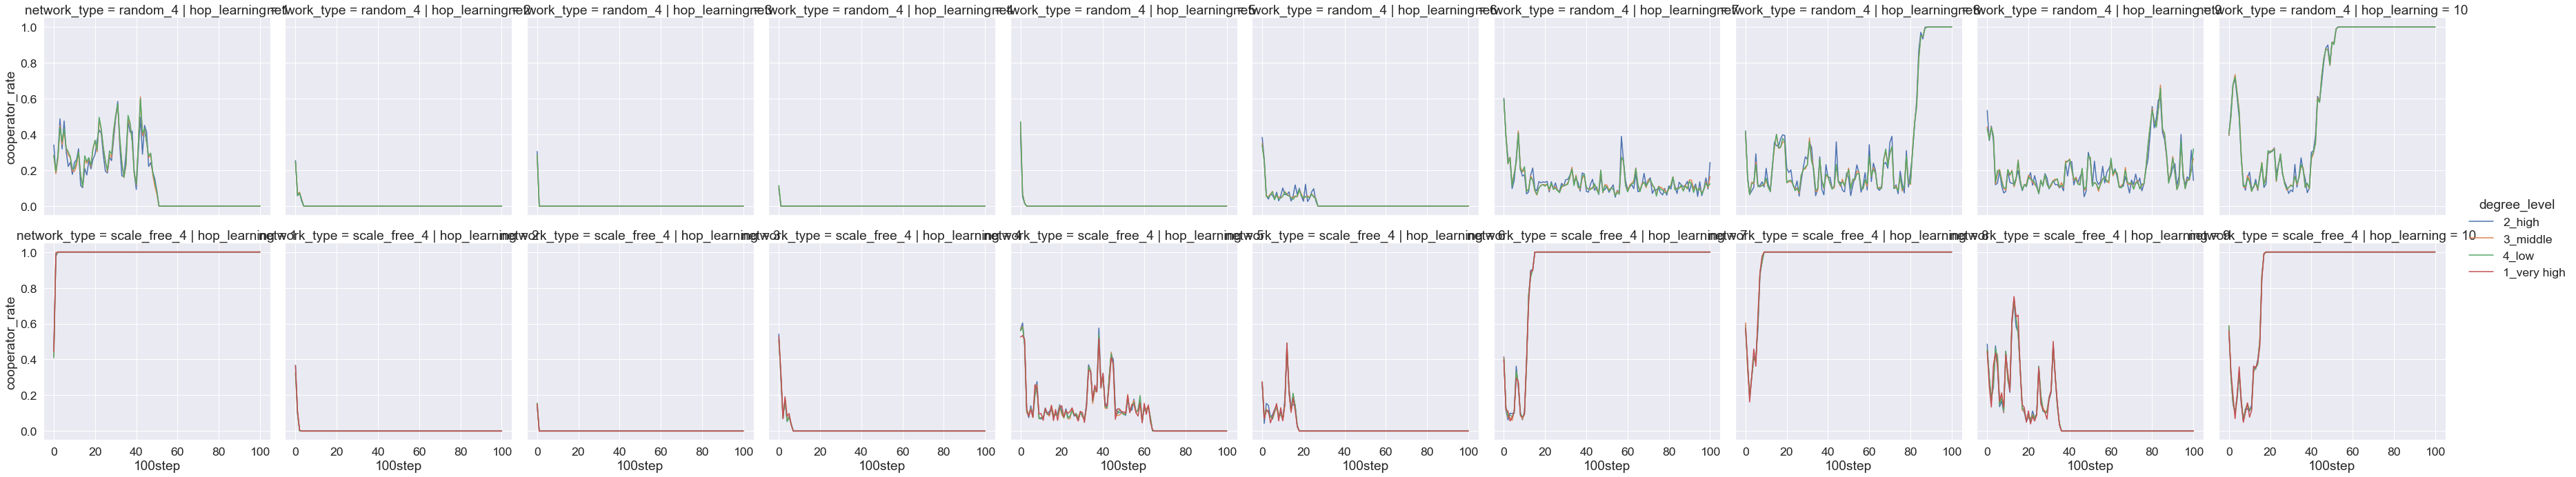

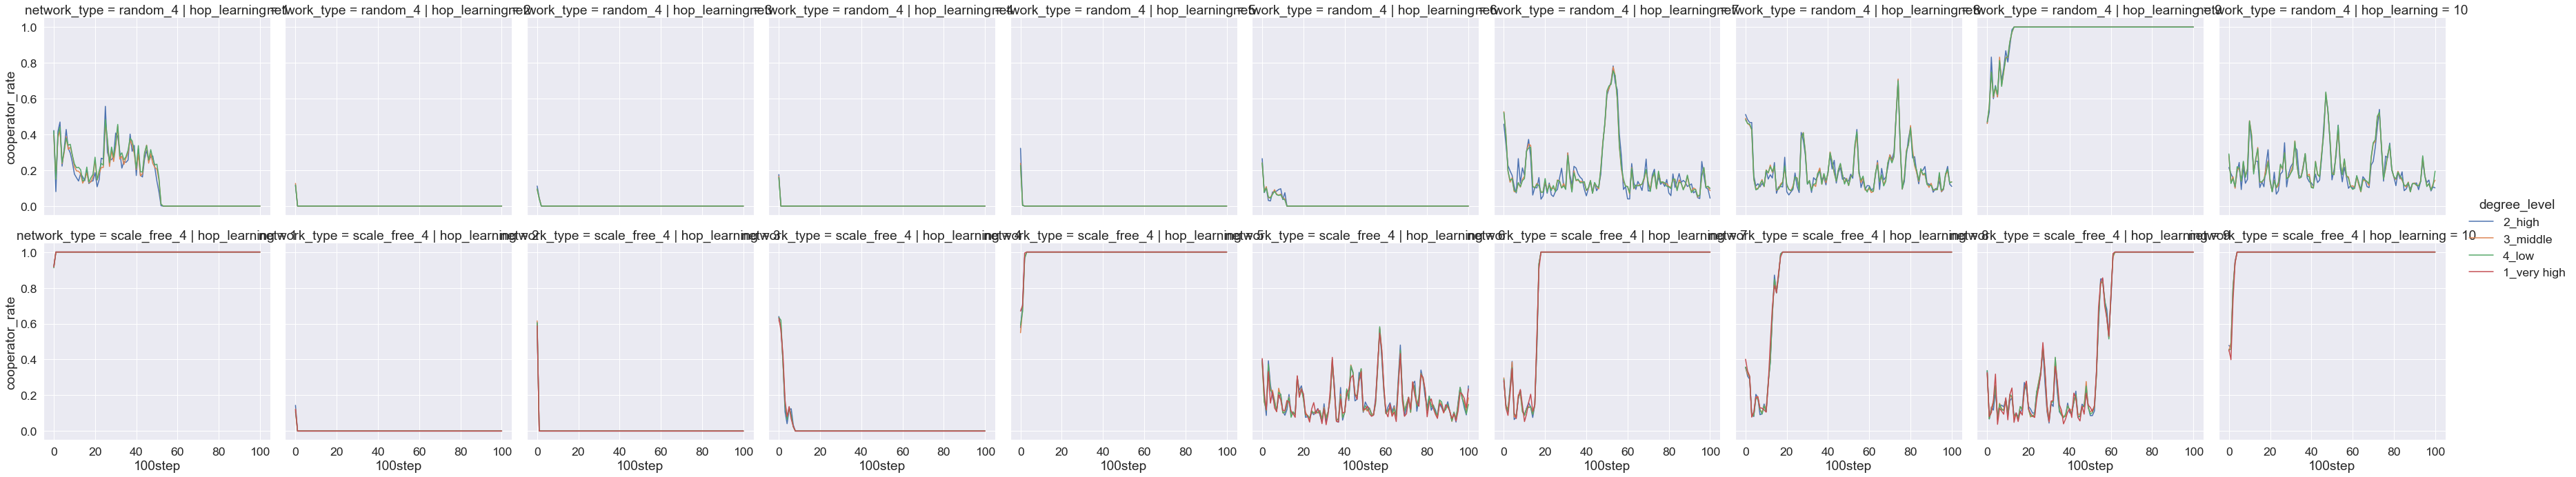

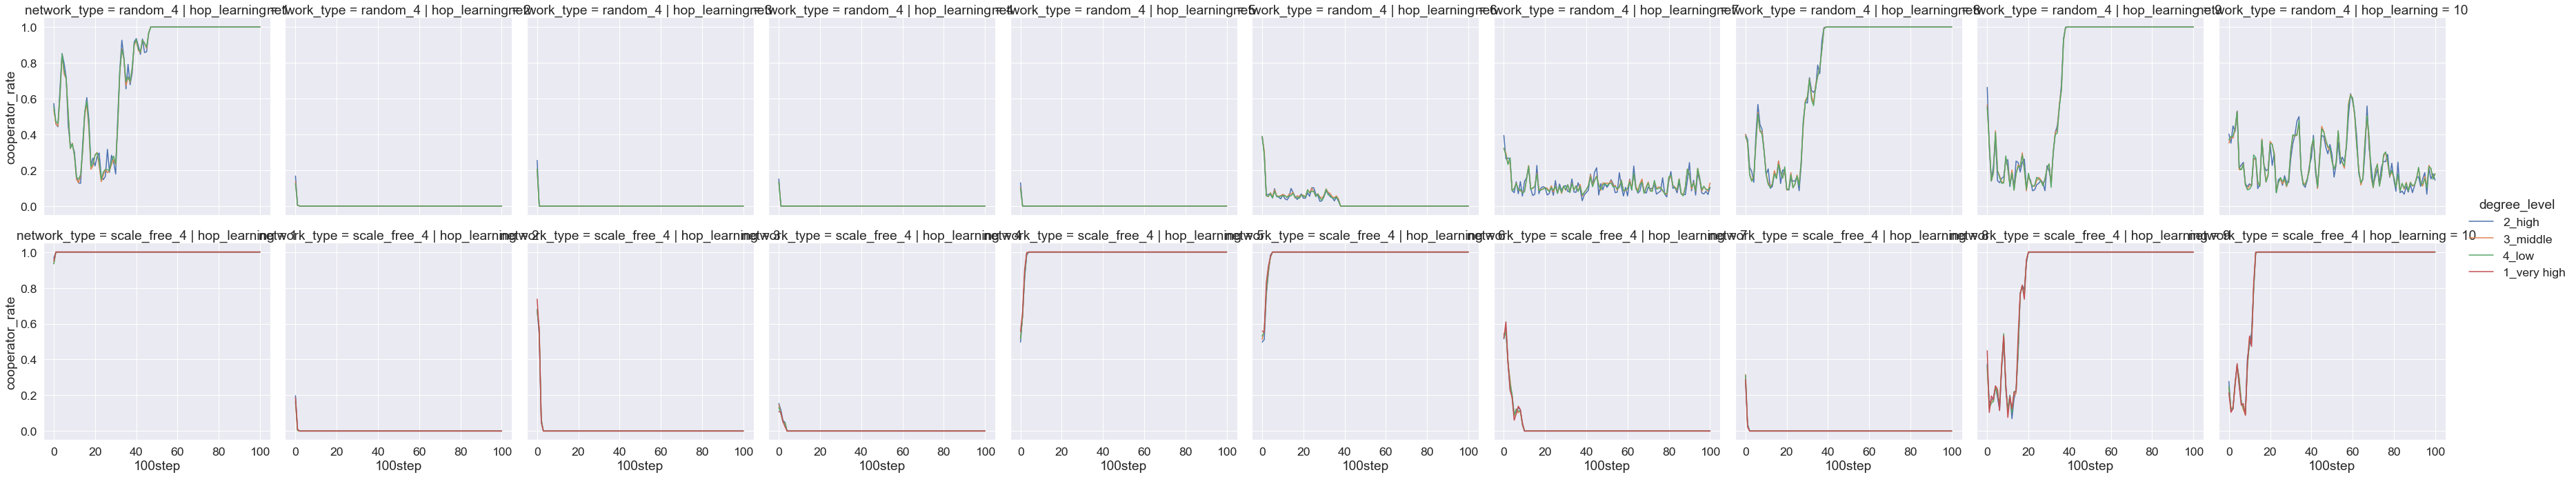

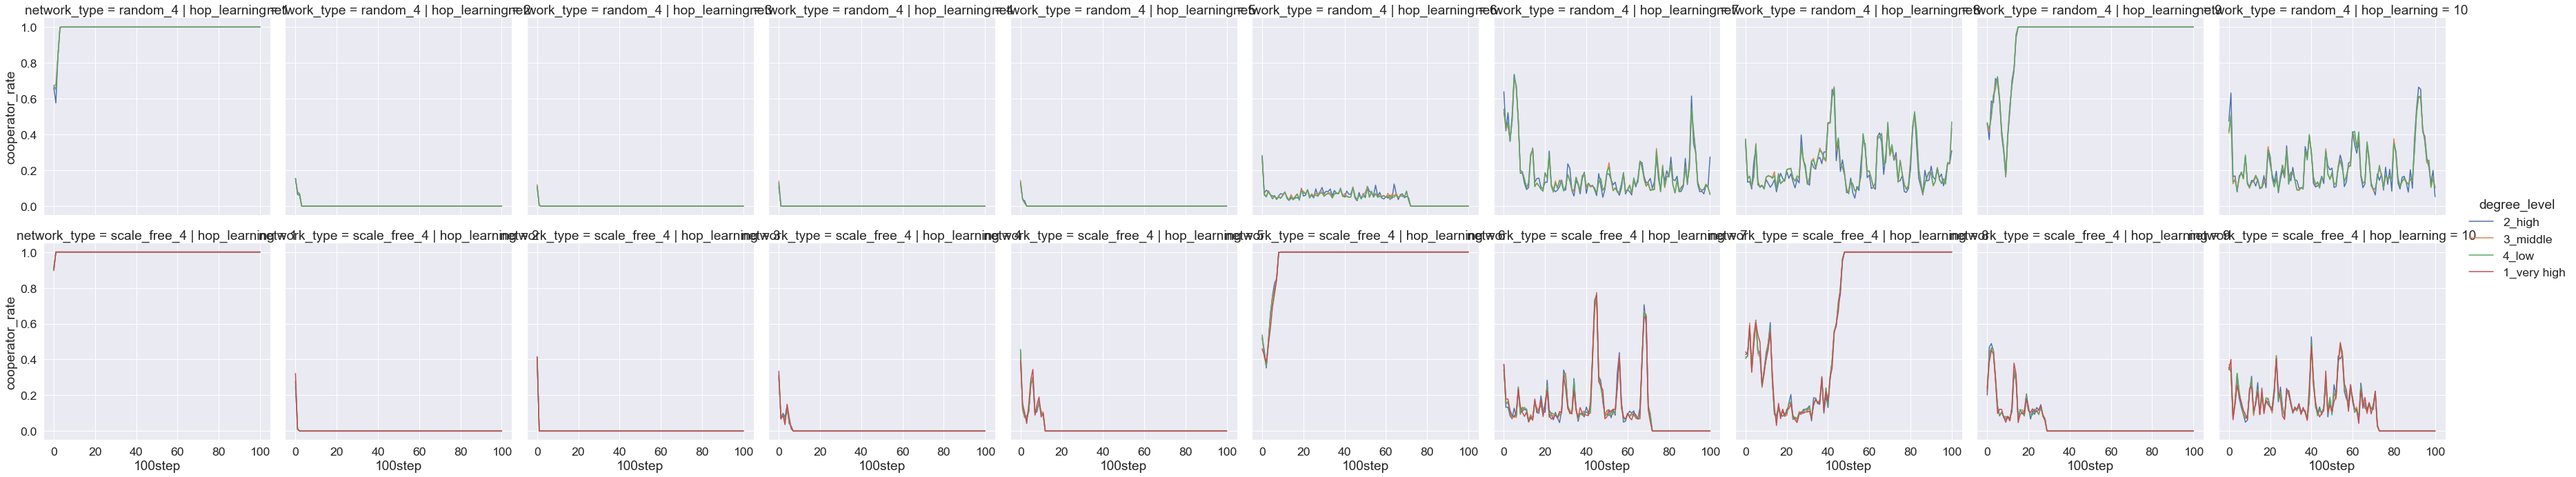

In [13]:
%%time
for trial in df_trn.trial.unique():
    sns.relplot(
        data=df_trn[(df_trn.network_type.isin(['scale_free_4', 'random_4'])) & (df_trn.trial == trial)],
        x='100step',
        y='cooperator_rate',
        hue='degree_level',
        row='network_type',
        col='hop_learning',
        kind='line'
    )

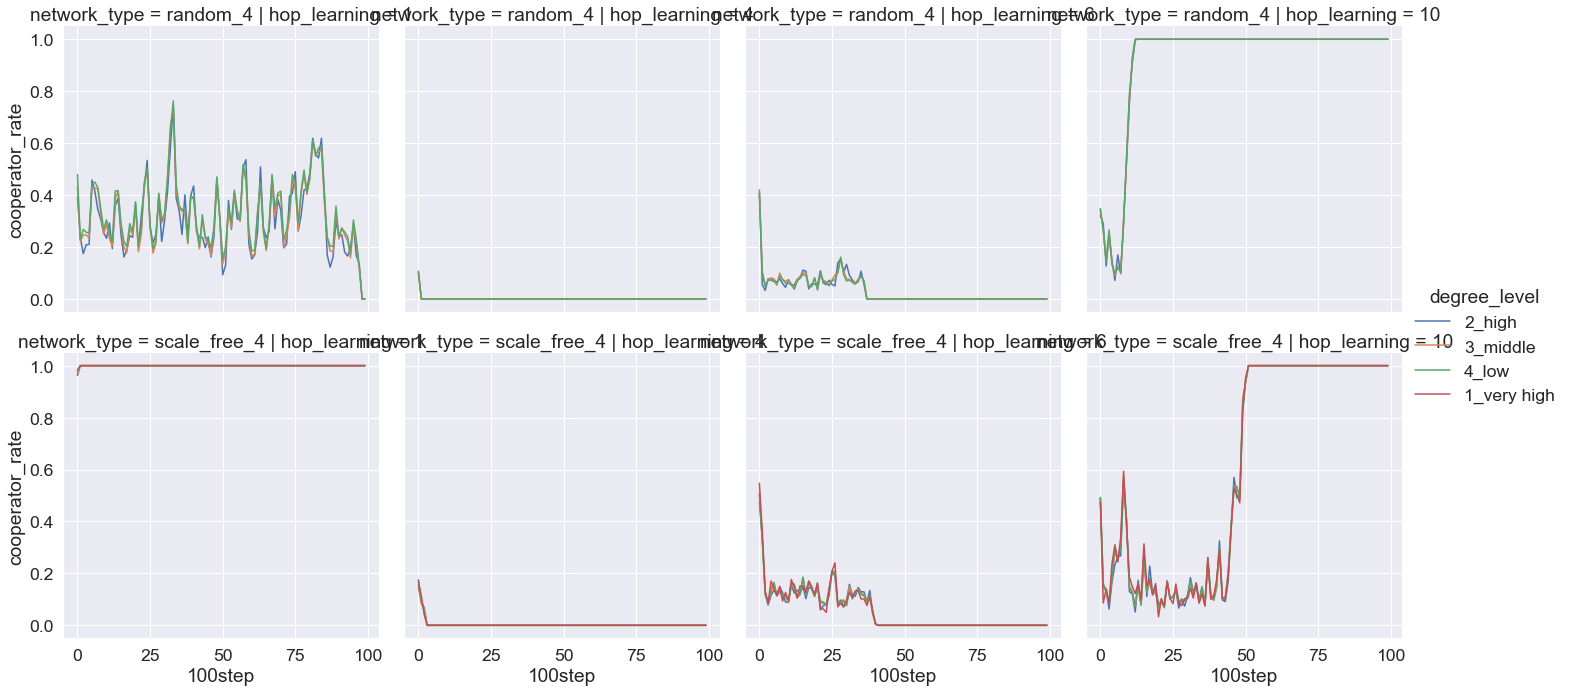

In [29]:
sns.relplot(
    data=df_trn[(df_trn.network_type.isin(['scale_free_4', 'random_4'])) & (df_trn.trial == 1) & (df_trn.hop_learning.isin([1, 4, 6, 10])) & (df_trn['100step'] < 100)],
    x='100step',
    y='cooperator_rate',
    hue='degree_level',
    row='network_type',
    col='hop_learning',
    kind='line'
)

In [ ]:
次数によってエージェントをカテゴライズする。
全体の協力率が上がるときに、次数の高いエージェントが先行するのか、次数の低いエージェントが先行するのかを、数字で表したい。
